# Self-Driving Car Engineer Nanodegree

## Project: Advanced Lane Finding

***

### Import Packages

In [1]:
# standard library imports
import glob # unused
import math
import os
import re # unused
import shutil

# related third party imports
import cv2
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # unused
from moviepy.editor import VideoFileClip
import numpy as np

# output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline

### Helper functions

In [2]:
def sorted_alphanumeric(data): # unused
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

### Camera calibration

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


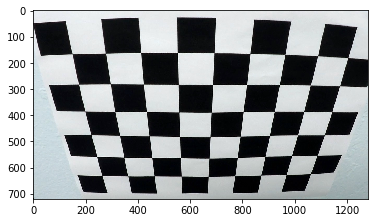

In [3]:
image = cv2.imread('camera_cal/calibration2.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [4]:
# prepare object points
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(7,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = os.listdir('camera_cal')

# Prepare output directory
if not os.path.exists('output_images/camera_cal/corners_found'):
            os.makedirs('output_images/camera_cal/corners_found')
        
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(f'camera_cal/{fname}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        
        write_name = f'output_images/camera_cal/corners_found/{fname}'
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
cv2.destroyAllWindows()

Text(0.5,1,'Chessboard Corners')

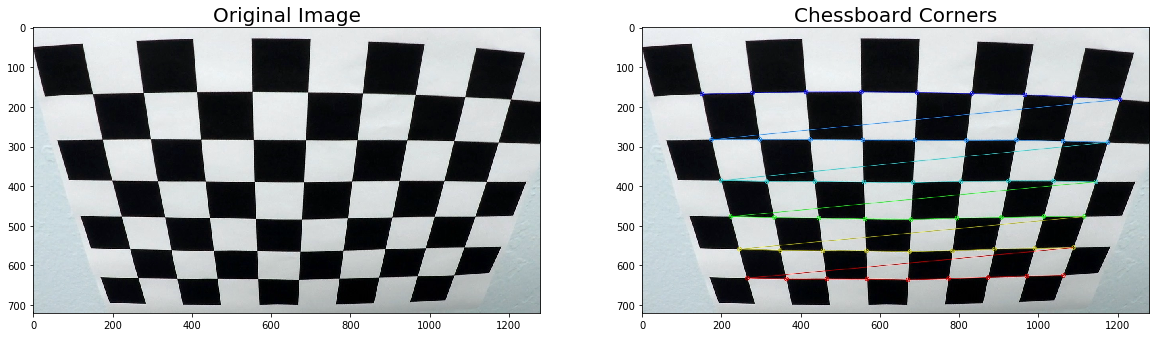

In [5]:
# Visualize chessboard corners
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.imread('camera_cal/calibration2.jpg'))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.imread('output_images/camera_cal/corners_found/calibration2.jpg'))
ax2.set_title('Chessboard Corners', fontsize=20)

### Undistortion

In [6]:
img_size = (image.shape[1], image.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Prepare output directory
if not os.path.exists('output_images/camera_cal/undistortion'):
            os.makedirs('output_images/camera_cal/undistortion')

for fname in images:
    img = cv2.imread(f'camera_cal/{fname}')
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    write_name = f'output_images/camera_cal/undistortion/{fname}'
    cv2.imwrite(write_name, dst)

Text(0.5,1,'Undistorted Image')

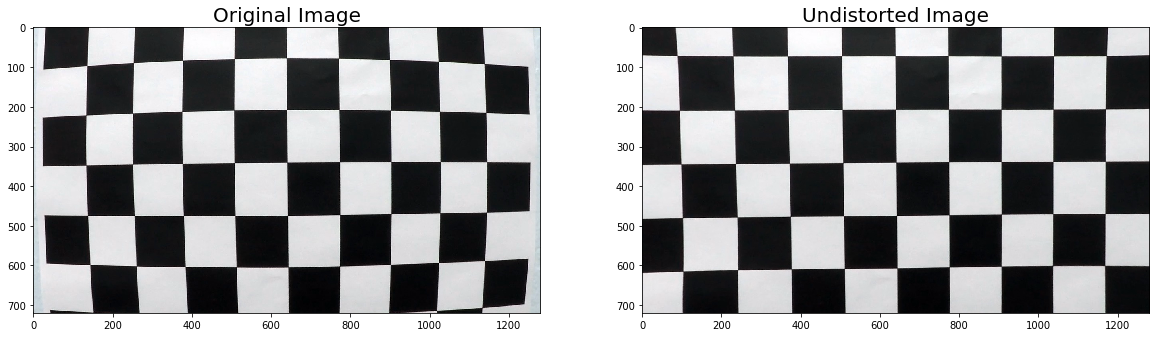

In [7]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.imread('camera_cal/calibration1.jpg'))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.imread('output_images/camera_cal/undistortion/calibration1.jpg'))
ax2.set_title('Undistorted Image', fontsize=20)

### Undistort test images

In [8]:
# Make a list of test images
test_images = os.listdir('test_images')

# Prepare output directory
if not os.path.exists('output_images/test_images/undistortion'):
            os.makedirs('output_images/test_images/undistortion')

for fname in test_images:
    img = cv2.imread(f'test_images/{fname}')
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    write_name = f'output_images/test_images/undistortion/{fname}'
    cv2.imwrite(write_name, undist)

Text(0.5,1,'Undistorted Image')

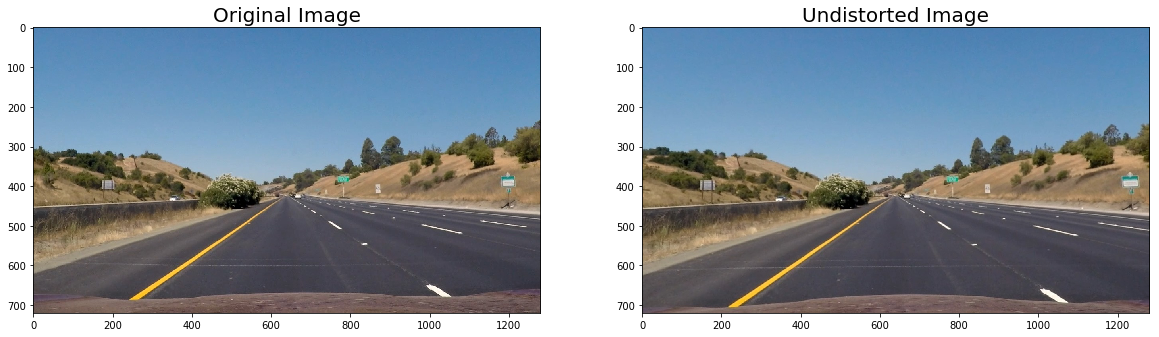

In [9]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('test_images/straight_lines1.jpg'))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(mpimg.imread('output_images/test_images/undistortion/straight_lines1.jpg'))
ax2.set_title('Undistorted Image', fontsize=20)

### Draw lines

In [10]:
src_coords = [[180, 675], [1100, 675], [692, 450], [588, 450]]

In [11]:
# Prepare output directory
if not os.path.exists('output_images/test_images/source_points'):
            os.makedirs('output_images/test_images/source_points')

undist_images = os.listdir('output_images/test_images/undistortion')

for fname in undist_images:
    img = cv2.imread(f'output_images/test_images/undistortion/{fname}')
    
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for idx in range(4):
        cv2.line(line_img, tuple(src_coords[-1+idx]), tuple(src_coords[idx]), (0,0,255), 5)
        
    img = cv2.addWeighted(img, 0.8, line_img, 1, 0)
        
    write_name = f'output_images/test_images/source_points/{fname}'
    cv2.imwrite(write_name, img)

Text(0.5,1,'Undistorted Image with source points drawn')

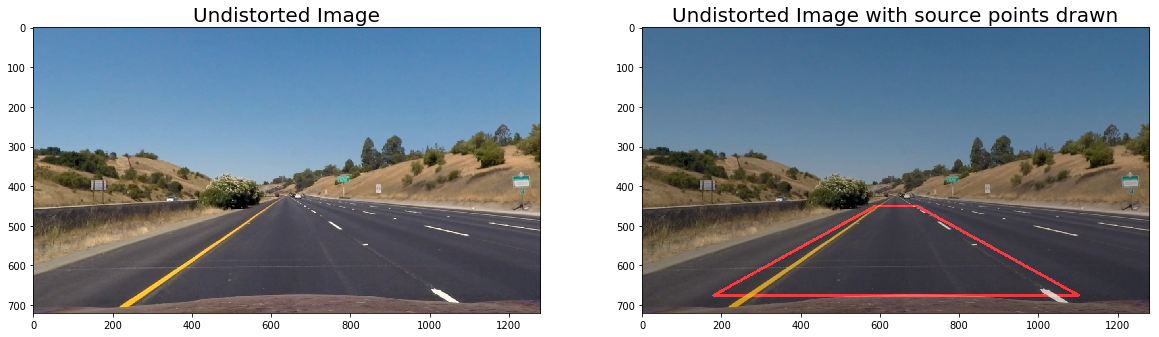

In [12]:
# Visualize lines
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/undistortion/straight_lines1.jpg'))
ax1.set_title('Undistorted Image', fontsize=20)
ax2.imshow(mpimg.imread('output_images/test_images/source_points/straight_lines1.jpg'))
ax2.set_title('Undistorted Image with source points drawn', fontsize=20)

### Perspective transform

In [13]:
# Prepare output directory
if not os.path.exists('output_images/test_images/warped'):
            os.makedirs('output_images/test_images/warped')

sp=450
        
dst_coords =[[sp, 720], [1280-sp, 720], [1280-sp, 0], [sp, 0]]

# Define perspective transform function
def warp(img):
    # Define calibration box in source (original) and destination (desired or warped) coordinates
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(src_coords)
    
    # Four desired coordinates
    dst = np.float32(dst_coords)
    
    # Compute perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Warp an image using the perspective transform
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped
    
for fname in undist_images:
    img = cv2.imread(f'output_images/test_images/undistortion/{fname}')
    
    write_name = f'output_images/test_images/warped/{fname}'
    cv2.imwrite(write_name, warp(img))
    
unwarp_images = os.listdir('output_images/test_images/warped')

if not os.path.exists('output_images/test_images/dest_points'):
            os.makedirs('output_images/test_images/dest_points')
    
for fname in unwarp_images:
    img = cv2.imread(f'output_images/test_images/warped/{fname}')
    
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for idx in range(4):
        cv2.line(line_img, tuple(dst_coords[-1+idx]), tuple(dst_coords[idx]), (0,0,255), 5)
        
    img = cv2.addWeighted(img, 0.8, line_img, 1, 0)
    
    write_name = f'output_images/test_images/dest_points/{fname}'
    cv2.imwrite(write_name, img)

Text(0.5,1,'Warped result with destination points drawn')

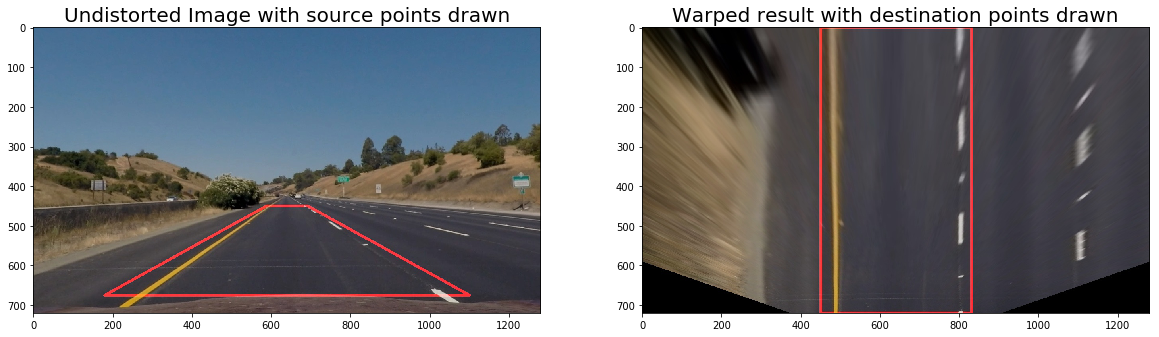

In [14]:
# Visualize perspective transform
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/source_points/straight_lines1.jpg'))
ax1.set_title('Undistorted Image with source points drawn', fontsize=20)
ax2.imshow(mpimg.imread('output_images/test_images/dest_points/straight_lines1.jpg'))
ax2.set_title('Warped result with destination points drawn', fontsize=20)

### CLAHE - Contrast Limited Adaptive Histogram Equalization

In [15]:
# Prepare output directory
if not os.path.exists('output_images/test_images/clahe'):
            os.makedirs('output_images/test_images/clahe')

for fname in undist_images:
    img = cv2.imread(f'output_images/test_images/undistortion/{fname}')
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # Converting image to CIELab colorspace
    
    l, a, b = cv2.split(lab) # Splitting the CIELab colorspace
    
    clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(8,8)) # Applying CLAHE to L-channel
    cl = clahe.apply(l)
    
    limg = cv2.merge((cl,a,b)) # Merge the CLAHE enhanced L-channel with the a and b channels
    
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) # Converting CIELab back to BGR
        
    write_name = f'output_images/test_images/clahe/{fname}'
    cv2.imwrite(write_name, final)

Text(0.5,1,'Undistorted Image with CLAHE applied')

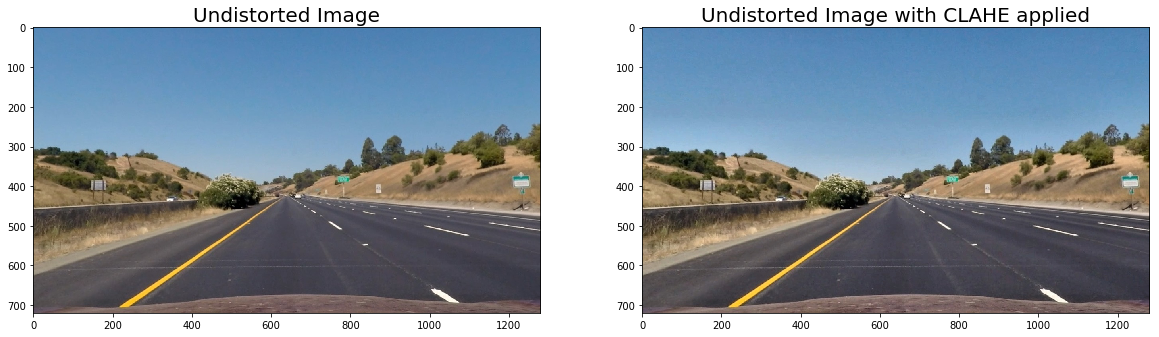

In [16]:
# Visualize CLAHE
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/undistortion/straight_lines1.jpg'))
ax1.set_title('Undistorted Image', fontsize=20)
ax2.imshow(mpimg.imread('output_images/test_images/clahe/straight_lines1.jpg'))
ax2.set_title('Undistorted Image with CLAHE applied', fontsize=20)

### Saturation Threshold

In [17]:
if not os.path.exists('output_images/test_images/sat_thresh'):
            os.makedirs('output_images/test_images/sat_thresh')
        
for fname in undist_images:
    img = cv2.imread(f'output_images/test_images/clahe/{fname}')

    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    h, l, s = cv2.split(hls)
    
    thresh = (90, 255)
    binary = np.zeros_like(s)
    binary[(s > thresh[0]) & (s <= thresh[1])] = 1
    
    write_name = f'output_images/test_images/sat_thresh/{fname}'
    cv2.imwrite(write_name, binary*255)

Text(0.5,1,'Saturation threshold binary Image')

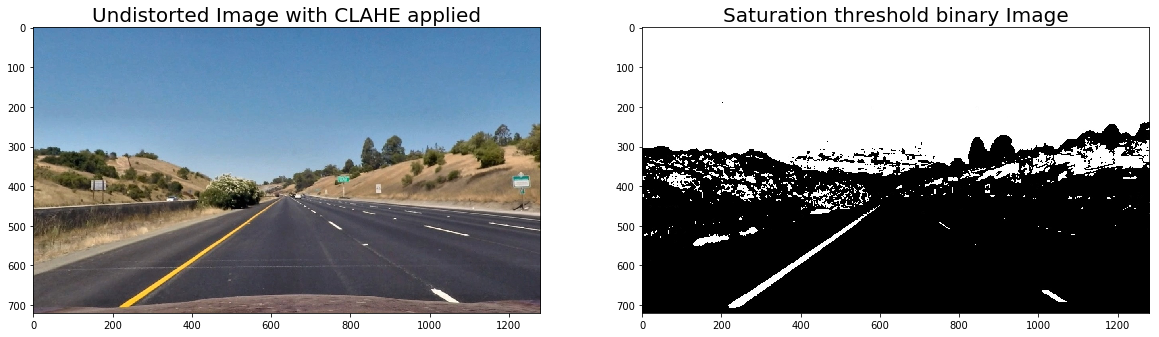

In [18]:
# Visualize CLAHE
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/clahe/straight_lines1.jpg'))
ax1.set_title('Undistorted Image with CLAHE applied', fontsize=20)
ax2.imshow(cv2.imread('output_images/test_images/sat_thresh/straight_lines1.jpg'))
ax2.set_title('Saturation threshold binary Image', fontsize=20)

### Applying Sobel Operator

In [19]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output


if not os.path.exists('output_images/test_images/sobel'):
            os.makedirs('output_images/test_images/sobel')

for fname in test_images:
    img = cv2.imread(f'output_images/test_images/clahe/{fname}')
    
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=25, thresh=(20, 100))
    grady = abs_sobel_thresh(img, orient='y', sobel_kernel=25, thresh=(20, 100))
    mag_binary = mag_thresh(img, sobel_kernel=25, mag_thresh=(30, 255))
    dir_binary = dir_threshold(img, sobel_kernel=25, thresh=(0.8, 1.5))

    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    write_name = f'output_images/test_images/sobel/{fname}'
    cv2.imwrite(write_name, combined*255)

Text(0.5,1,'Sobel Operator applied binary Image')

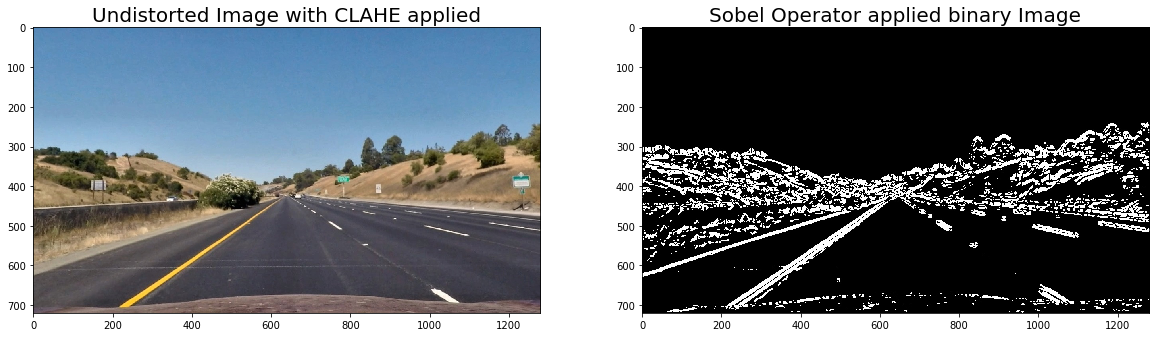

In [20]:
# Visualize Sobel
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/clahe/straight_lines1.jpg'))
ax1.set_title('Undistorted Image with CLAHE applied', fontsize=20)
ax2.imshow(cv2.imread('output_images/test_images/sobel/straight_lines1.jpg'))
ax2.set_title('Sobel Operator applied binary Image', fontsize=20)

### Sobel and Saturation thresholds combined

In [21]:
if not os.path.exists('output_images/test_images/combined'):
            os.makedirs('output_images/test_images/combined')

for fname in test_images:
    img_sobel = cv2.imread(f'output_images/test_images/sobel/{fname}')/255
    img_sat_thresh = cv2.imread(f'output_images/test_images/sat_thresh/{fname}')/255
    
    combined = np.zeros_like(img_sat_thresh)
    combined[(img_sobel == 1) | (img_sat_thresh == 1)] = 1
    
    write_name = f'output_images/test_images/combined/{fname}'
    cv2.imwrite(write_name, combined*255)

Text(0.5,1,'Thresholds combined Image')

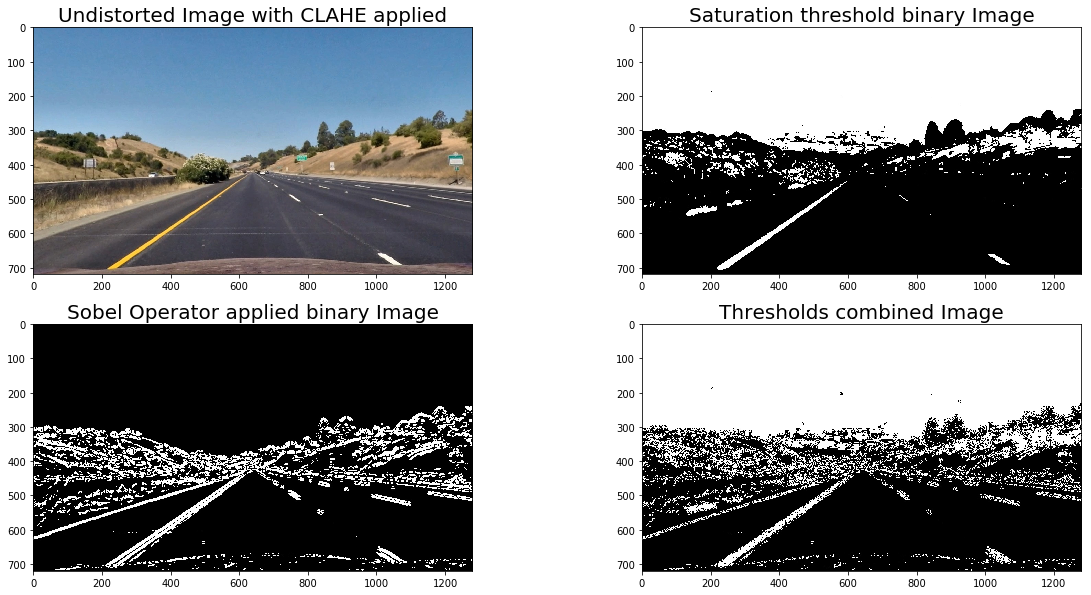

In [22]:
# Visualize combined
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].imshow(mpimg.imread('output_images/test_images/clahe/straight_lines1.jpg'))
axs[0, 0].set_title('Undistorted Image with CLAHE applied', fontsize=20)
axs[0, 1].imshow(cv2.imread('output_images/test_images/sat_thresh/straight_lines1.jpg'))
axs[0, 1].set_title('Saturation threshold binary Image', fontsize=20)
axs[1, 0].imshow(cv2.imread('output_images/test_images/sobel/straight_lines1.jpg'))
axs[1, 0].set_title('Sobel Operator applied binary Image', fontsize=20)
axs[1, 1].imshow(cv2.imread('output_images/test_images/combined/straight_lines1.jpg'))
axs[1, 1].set_title('Thresholds combined Image', fontsize=20)

### Perspective transformed

In [23]:
if not os.path.exists('output_images/test_images/combined_unwarp'):
            os.makedirs('output_images/test_images/combined_unwarp')

for fname in test_images:
    img = cv2.imread(f'output_images/test_images/combined/{fname}')
    
    write_name = f'output_images/test_images/combined_unwarp/{fname}'
    cv2.imwrite(write_name, warp(img))

Text(0.5,1,'Perspective transformed')

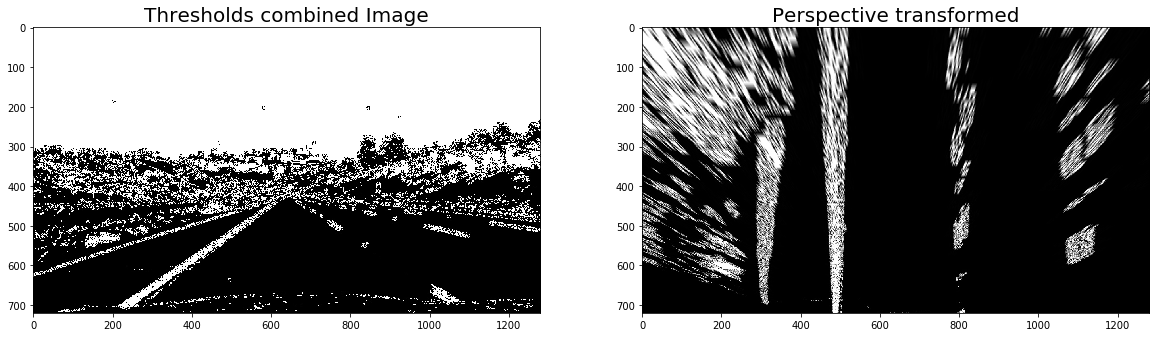

In [24]:
# Visualize Perspective transform
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(mpimg.imread('output_images/test_images/combined/straight_lines1.jpg'))
ax1.set_title('Thresholds combined Image', fontsize=20)
ax2.imshow(cv2.imread('output_images/test_images/combined_unwarp/straight_lines1.jpg'))
ax2.set_title('Perspective transformed', fontsize=20)

### Lane histogram

In [25]:
if not os.path.exists('output_images/test_images/histogram'):
            os.makedirs('output_images/test_images/histogram')
        
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    return histogram

for fname in test_images:
    img = cv2.imread(f'output_images/test_images/combined_unwarp/{fname}')/255
    
    histogram = hist(img)
    
    plt.figure()
    plt.plot(histogram)
    write_name = f'output_images/test_images/histogram/{fname}'
    plt.savefig(write_name)
    
%matplotlib nbagg

Text(0.5,1,'Perspective transformed')

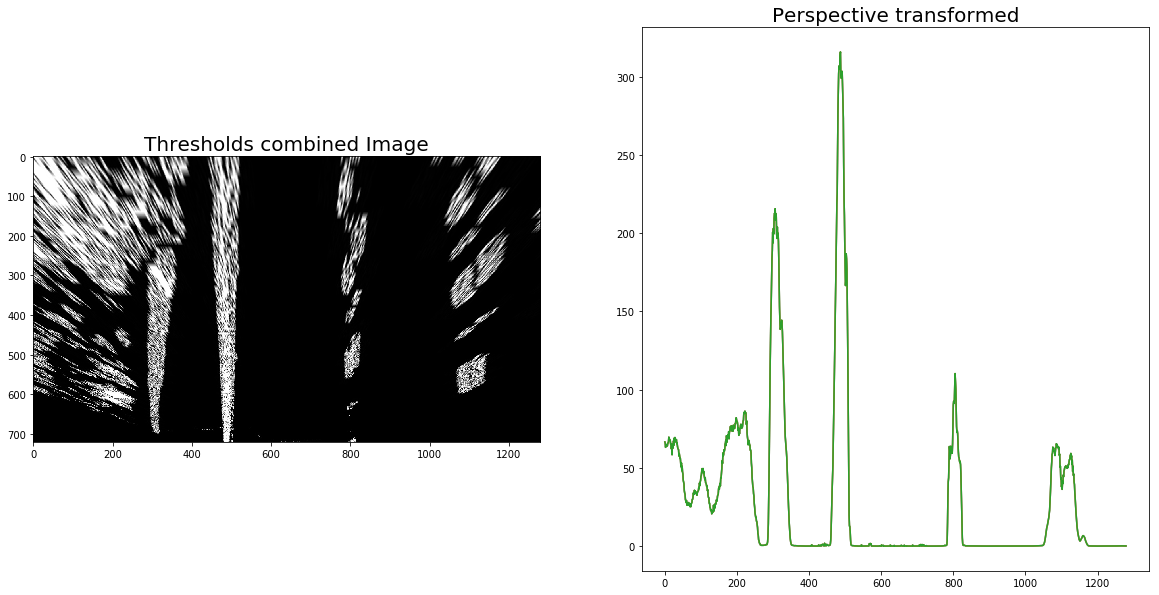

In [26]:
%matplotlib inline
# Visualize Histogram
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.imread('output_images/test_images/combined_unwarp/straight_lines1.jpg'))
ax1.set_title('Thresholds combined Image', fontsize=20)
ax2.plot(hist(cv2.imread('output_images/test_images/combined_unwarp/straight_lines1.jpg')/255))
# ax2.imshow(cv2.imread('output_images/test_images/histogram/straight_lines1.jpg'))
ax2.set_title('Perspective transformed', fontsize=20)

### Sliding window

In [27]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img


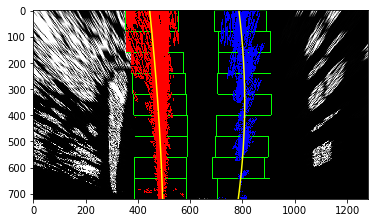

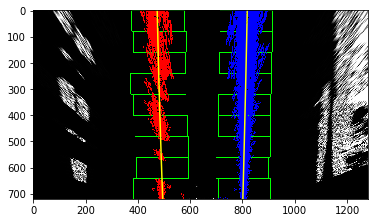

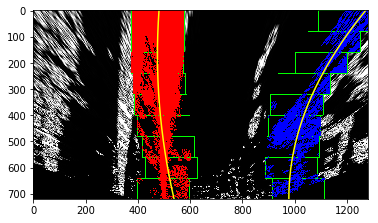

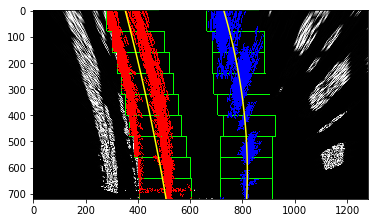

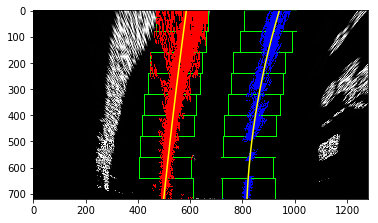

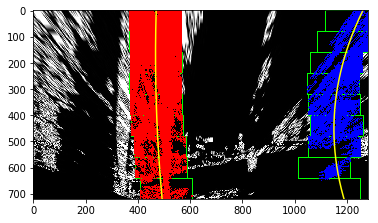

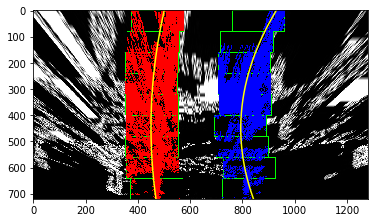

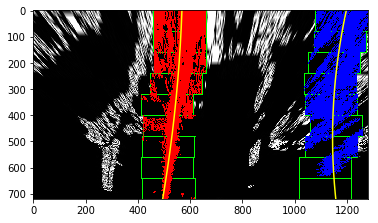

In [28]:
if not os.path.exists('output_images/test_images/sliding'):
            os.makedirs('output_images/test_images/sliding')

for fname in test_images:
    img = cv2.imread(f'output_images/test_images/combined_unwarp/{fname}', 0)
    
    write_name = f'output_images/test_images/sliding/{fname}'
    plt.figure()
    plt.imshow(fit_polynomial(img))
    plt.savefig(write_name)
#     cv2.imwrite(write_name, fit_polynomial(img))


In [109]:
##### REFACTORING #####

# standard library imports
import glob # unused
import math
import os
import re # unused
import shutil
from typing import Dict, Tuple, List, Generator, Callable

# related third party imports
import cv2
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # unused
from moviepy.editor import VideoFileClip
import numpy as np

# output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline

In [110]:
class ImageIO:
    """Stores basic image read/write functions."""
    
    def img_write(self, img_path, img_fname, img, write_func=cv2.imwrite):
        """Write image at specified path and filename.
        
        Args:
            img_path (str): Image path.
            img_fname (str): Image filename.
            img (img): Image file.
            write_func (func): Image write function. Defaults to cv2.imwrite.

        Returns:
            None
        """
        if not os.path.exists(img_path):
            os.makedirs(img_path)
        write_func(f'{img_path}/{img_fname}', img)
        return
    
    def imgs_gen(self, directory):
        """Return generator that yields JPGs within a directory.
        
        Args:
            directory (str): Directory to yield images from.

        Returns:
            generator: yields JPG images within directory.
        """
        for img_path in glob.glob(f'./{directory}/*.jpg'):
            yield cv2.imread(img_path)

In [111]:
class ImageProcessor:
    """Stores basic image processing functions."""
    
    ##### SOBEL THRESHOLDS #####
    
    def abs_sobel_thresh(self, img, orient='x', sobel_kernel=3, thresh=(0, 255)):
        """Calculate directional gradient and apply threshold"""
        gray = self.grayscale(img)
        if orient == 'x':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
        if orient == 'y':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
        scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
        binary_output = np.zeros_like(scaled_sobel)
        binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
        return binary_output
    
    def mag_thresh(self, img, sobel_kernel=3, mag_thresh=(0, 255)):
        """Calculate gradient magnitude and apply threshold"""
        gray = self.grayscale(img)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
        gradmag = np.sqrt(sobelx**2 + sobely**2)
        scale_factor = np.max(gradmag)/255 
        gradmag = (gradmag/scale_factor).astype(np.uint8) 
        binary_output = np.zeros_like(gradmag)
        binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
        return binary_output
    
    def dir_threshold(self, img, sobel_kernel=3, thresh=(0, np.pi/2)):
        """Calculate gradient direction and apply threshold"""
        gray = self.grayscale(img)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
        absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
        binary_output =  np.zeros_like(absgraddir)
        binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
        return binary_output
    
    ##### COLOR THRESHOLDS #####
    
    def hls_threshold(self, img, threshold=(220, 255)):
        """Apply HLS threshold"""
        hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        h, l, s = cv2.split(hls)
        binary = np.zeros_like(s)
        binary[(s > threshold[0]) & (s <= threshold[1])] = 1
        return binary
    
    ##### COLOR CONVERTERS #####
    
    def grayscale(self, img):
        """Apply grayscale color conversion"""
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ##### BRIGHTNESS, CONTRAST FEATURES #####
    
    def clahe(self, img):
        """Apply CLAHE - contrast limited adaptive histogram equalization"""
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl,a,b))
        final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
        return final
    
    ##### PREPROCESSING #####
    
    def undistort(self, img, mtx, dist):
        """Undistort the image"""
        return cv2.undistort(img, mtx, dist, None, mtx)

In [112]:
class Camera(ImageProcessor, ImageIO):
    OUTPUT_DIR = 'output_images'
    
    def calibrate(self, imgs_dir, inside_corners, is_img_saved=False):
        """Return camera matrix and distortion coefficients tuple.
        
        Args:
            imgs_dir (str): Directory of calibration images.
            inside_corners (tuple): Tuple of number of inside corners in x and y directions.
            is_img_saved (bool): Flag. Controls saving of calibration images with
                chessboard corners drawn. Defaults to False.

        Returns:
            tuple: Camera matrix and distortion coefficients
        """
        
        objpoints = []
        imgpoints = []
        nx, ny = inside_corners
        obj_pts = np.zeros((nx * ny, 3), np.float32)
        obj_pts[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
        
        img_shape = None
        
        for img in self.imgs_gen(imgs_dir):
            if not img_shape:
                img_shape = img.shape
            gray = self.grayscale(img)
            ret, corners = cv2.findChessboardCorners(gray, inside_corners, None)
            if ret == True:
                objpoints.append(obj_pts)
                imgpoints.append(corners)
                if is_img_saved:
                    cv2.drawChessboardCorners(img, inside_corners, corners, ret)
                    self.img_write(f'{self.OUTPUT_DIR}/{imgs_dir}/corners_found',
                                   img_fname, img)
                
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                                                           (img_shape[1], img_shape[0]),None,None)
        
        return (mtx,dist)

In [113]:
class LaneFindingPipeline(ImageProcessor):
    SRC_QUAD_COORDS = np.float32([[180, 675], [1100, 675], [694, 450], [586, 450]])
    SPACING = 500
    DST_QUAD_COORDS = np.float32([[SPACING, 720], [1280-SPACING, 720], [1280-SPACING, 0], [SPACING, 0]])
    
    def __init__(self, mtx, dist):
        self.mtx = mtx
        self.dist = dist
        
    def warp(self, img):
        """Divide into getM, getMinv,warp/unwarp and move to BaseOpenCV2Processor"""
        M = cv2.getPerspectiveTransform(self.SRC_QUAD_COORDS, self.DST_QUAD_COORDS)
        Minv = cv2.getPerspectiveTransform(self.DST_QUAD_COORDS, self.SRC_QUAD_COORDS)
        return cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR), M, Minv
        
    def run(self, img):
        self.img = img
        self.img_rows, self.img_cols = img.shape[:2]
        self.img_copy = np.copy(img)
        self.img_copy = self.undistort(self.img_copy, self.mtx, self.dist)
        
        self.img_copy = self.clahe(self.img_copy)
        self.img_copy = self.combined_binary(self.img_copy)
        
        self.img_copy = self.warp(self.img_copy)[0]
        
        self.img_copy = self.fit_polynomial(self.img_copy)
        #self.img_copy = search_around_poly(self.img_copy)
        
        return self.img_copy
    
    def draw_dst_quad(self, img):
        img = self.warp(self.undistort(img))[0]
        line_img = np.zeros((*img.shape[:2], 3), dtype=np.uint8)
        for idx in range(4):
            cv2.line(line_img, tuple(self.DST_QUAD_COORDS[-1+idx]), tuple(self.DST_QUAD_COORDS[idx]), (0,0,255), 5)
        return cv2.addWeighted(img, 0.8, line_img, 1, 0)
    
    def draw_src_quad(self, img):
        img = self.undistort(img)
        line_img = np.zeros((*img.shape[:2], 3), dtype=np.uint8)
        for idx in range(4):
            cv2.line(line_img, tuple(self.SRC_QUAD_COORDS[-1+idx]), tuple(self.SRC_QUAD_COORDS[idx]), (0,0,255), 5)
        return cv2.addWeighted(img, 0.8, line_img, 1, 0)
    
    def combined_binary(self, img):
        hls_binary = self.hls_threshold(np.copy(img))#
        gradx = self.abs_sobel_thresh(np.copy(img), orient='x', sobel_kernel=25, thresh=(50, 100))#
        grady = self.abs_sobel_thresh(np.copy(img), orient='y', sobel_kernel=25, thresh=(80, 200))
        mag_binary = self.mag_thresh(np.copy(img), sobel_kernel=25, mag_thresh=(100, 255))
        dir_binary = self.dir_threshold(np.copy(img), sobel_kernel=25, thresh=(0.8, 1.5))#

        combined = np.zeros_like(dir_binary)
        #combined[(dir_binary == 1)] = 1
        combined[(gradx == 1) | (dir_binary == 1) & (hls_binary == 1)] = 1
        #combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (hls_binary == 1)] = 1
        return (combined*255).astype(np.uint8)
    
    def find_lane_pixels(self, binary_warped):
        self.histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        midpoint = np.int(self.histogram.shape[0]//2)
        leftx_base = np.argmax(self.histogram[:midpoint])
        rightx_base = np.argmax(self.histogram[midpoint:]) + midpoint

        nwindows = 9
        margin = 100
        minpix = 50

        window_height = np.int(binary_warped.shape[0]//nwindows)
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        leftx_current = leftx_base
        rightx_current = rightx_base

        left_lane_inds = []
        right_lane_inds = []

        for window in range(nwindows):
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin

            cv2.rectangle(out_img,(win_xleft_low,win_y_low),
            (win_xleft_high,win_y_high),(0,255,0), 3) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),
            (win_xright_high,win_y_high),(0,255,0), 3) 

            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)

            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        try:
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
        except ValueError:
            pass

        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        return leftx, lefty, rightx, righty, out_img


    def fit_polynomial(self, binary_warped):
        leftx, lefty, rightx, righty, out_img = self.find_lane_pixels(binary_warped)

        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)

        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        try:
            left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
            right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        except TypeError:
            print('The function failed to fit a line!')
            left_fitx = 1*ploty**2 + 1*ploty
            right_fitx = 1*ploty**2 + 1*ploty

        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty, rightx] = [0, 0, 255]

        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')

        return out_img
    
    def fit_poly(self, img_shape, leftx, lefty, rightx, righty):
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        return left_fitx, right_fitx, ploty
    
    def search_around_poly(self, binary_warped):
        margin = 100

        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])

        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                        left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                        left_fit[1]*nonzeroy + left_fit[2] + margin)))
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                        right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                        right_fit[1]*nonzeroy + right_fit[2] + margin)))

        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        left_fitx, right_fitx, ploty = self.fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)

        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')

        return result
    
    def measure_curvature_real():
        '''
        Calculates the curvature of polynomial functions in meters.
        '''
        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension

        # Start by generating our fake example data
        # Make sure to feed in your real data instead in your project!
        ploty, left_fit_cr, right_fit_cr = generate_data(ym_per_pix, xm_per_pix)

        # Define y-value where we want radius of curvature
        # We'll choose the maximum y-value, corresponding to the bottom of the image
        y_eval = np.max(ploty)

        # Calculation of R_curve (radius of curvature)
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

        return left_curverad, right_curverad



In [114]:
(mtx, dist) = Camera().calibrate('camera_cal', (9,6))

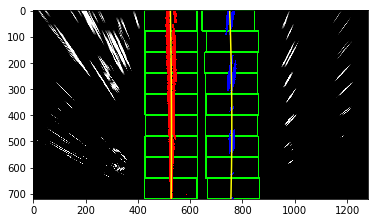

In [115]:
LFP = LaneFindingPipeline(mtx, dist)
img = cv2.imread('test_images/straight_lines1.jpg')
# 3-channels
# plt.imshow(cv2.cvtColor(LFP.run(img), cv2.COLOR_BGR2RGB))

# binary (LFP.run(img) * 255).astype(np.uint8)
plt.imshow(LFP.run(img), cmap="gray")